# Proyecto Segundo Bimestre - Análisis de Venta de Autos

### Objetivo

* Evaluar la oferta de vehiculos en la ciudad de Quito

### Proceso

* Mediante webscrapy se obtuvo los vehiculos que estan a la venta en la ciudad de Quito,la página seleccionada para obtener la información fue OLX. El código para esa parte se la puede encotrar en la carpeta UsedCarResearch del proyect
* Con pandas se carga la información obetenida anteriormente
* Se realiza un limpiado de la información
* Se identifican las marcas de vehiculos
* Puntos a evaluar: 
    * Cantidad de autos por marca en venta.
    * Valor de los autos por marca 

In [27]:
import csv
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import spacy

* Se carga el idioma que identificara las etiquetas

In [ ]:
nlp = spacy.load('en_core_web_lg')

* Leemos la información obtenida a través de web scrapy

In [18]:
# columns=['Informacion', 'Ubicacion', 'Precio', 'Negociacion', 'Fecha']

df_cars = pd.read_csv('../UsedCarResearch/data.csv', sep=';', engine='python')
df_cars = df_cars.reset_index(drop=True)
df_cars

,Informacion,Localizacion,Precio,Negociacion,Publicacion
0,Nissan Note 2014 - 49000 km,en Quito,$16.900,Negociable,21 Ene
1,Gran i10 1.0 y 1.2cc Sedan y Hackback,en Quito,$12.590,NaN,22 Ene
2,Kia Pregio 2004 - 251363 km,en Quito,$11.900,NaN,3 Feb
3,Kia Sportage 2012 - 145000 km,en Quito,$16.800,Negociable,4 Feb
4,Kia Sportage 2011 - 165000 km,en Quito,$19.900,Negociable,"Hoy,"
5,Vendo Chevrolet Cruze 2014 Full,en Quito,$18.900,Negociable,"Hoy,"
6,Flamante Great Wall Haval M4 2018 Full,en Quito,$15.800,NaN,"Hoy,"
7,Nissan Sentra 2012 - 68000 km,en Quito,$14.200,Negociable,"Hoy,"
8,Chevrolet Sail 2013 - 67000 km,en Quito,$12.200,Negociable,"Hoy,"
9,SsangYong Kyron 2006 - 175600 km,en Quito,$10.800,NaN,"Hoy,"


* Obtenemos las marcas que se manejan en el informe

In [16]:
def extract_entity(value): 
    doc = nlp(value)
    words_with_entity = list(map(lambda token: token.text, filter(lambda token: token.ent_type_ == 'ORG', doc)))
    if words_with_entity:
        return words_with_entity[0]
    return 'NaN'

In [20]:
def resolve_entities(dataframe):
    dataframe['Marca'] = dataframe['Informacion'].map(extract_entity)
    return dataframe

In [21]:
df_cars = resolve_entities(dataframe=df_cars)


,Informacion,Localizacion,Precio,Negociacion,Publicacion,Marca
0,Nissan Note 2014 - 49000 km,en Quito,$16.900,Negociable,21 Ene,Nissan
1,Gran i10 1.0 y 1.2cc Sedan y Hackback,en Quito,$12.590,NaN,22 Ene,NaN
2,Kia Pregio 2004 - 251363 km,en Quito,$11.900,NaN,3 Feb,Kia
3,Kia Sportage 2012 - 145000 km,en Quito,$16.800,Negociable,4 Feb,Kia
4,Kia Sportage 2011 - 165000 km,en Quito,$19.900,Negociable,"Hoy,",Kia
5,Vendo Chevrolet Cruze 2014 Full,en Quito,$18.900,Negociable,"Hoy,",NaN
6,Flamante Great Wall Haval M4 2018 Full,en Quito,$15.800,NaN,"Hoy,",NaN
7,Nissan Sentra 2012 - 68000 km,en Quito,$14.200,Negociable,"Hoy,",Nissan
8,Chevrolet Sail 2013 - 67000 km,en Quito,$12.200,Negociable,"Hoy,",Chevrolet
9,SsangYong Kyron 2006 - 175600 km,en Quito,$10.800,NaN,"Hoy,",NaN


* Precio numericos

In [36]:
def clean_price(dataframe):
    dataframe['Precio'] = dataframe['Precio'].str.replace('$', '')
    dataframe['Precio'] = dataframe['Precio'].str.replace('.', '')
    dataframe['Precio'] = pd.to_numeric(dataframe['Precio'], errors='coerce')
    return dataframe

In [37]:
df_cars = clean_price(df_cars)
df_cars

,Informacion,Localizacion,Precio,Negociacion,Publicacion,Marca
0,Nissan Note 2014 - 49000 km,en Quito,16900.0,Negociable,21 Ene,Nissan
2,Kia Pregio 2004 - 251363 km,en Quito,11900.0,NaN,3 Feb,Kia
3,Kia Sportage 2012 - 145000 km,en Quito,16800.0,Negociable,4 Feb,Kia
4,Kia Sportage 2011 - 165000 km,en Quito,19900.0,Negociable,"Hoy,",Kia
7,Nissan Sentra 2012 - 68000 km,en Quito,14200.0,Negociable,"Hoy,",Nissan
8,Chevrolet Sail 2013 - 67000 km,en Quito,12200.0,Negociable,"Hoy,",Chevrolet
10,Chevrolet Sail 2013 - 200000 km,en Quito,16300.0,Negociable,"Hoy,",Chevrolet
11,Renault Logan 2012 - 108000 km,en Quito,10400.0,NaN,"Hoy,",Renault
12,Audi Q5 2010 - 150000 km,en Quito,32200.0,Negociable,"Hoy,",Audi
13,Ford Explorer 2009 - 88000 km,en Quito,20000.0,NaN,"Hoy,",Ford


* Limpiamos las marcas que no interesan

In [26]:
df_cars = df_cars[df_cars['Marca'] != 'NaN']
df_cars = df_cars[df_cars['Marca'] != 'Vendo']
df_cars = df_cars[df_cars['Marca'] != 'VENDO']
df_cars = df_cars[df_cars['Marca'] != '4x2']
df_cars = df_cars[df_cars['Marca'] != '4X2']
df_cars

,Informacion,Localizacion,Precio,Negociacion,Publicacion,Marca
0,Nissan Note 2014 - 49000 km,en Quito,$16.900,Negociable,21 Ene,Nissan
2,Kia Pregio 2004 - 251363 km,en Quito,$11.900,NaN,3 Feb,Kia
3,Kia Sportage 2012 - 145000 km,en Quito,$16.800,Negociable,4 Feb,Kia
4,Kia Sportage 2011 - 165000 km,en Quito,$19.900,Negociable,"Hoy,",Kia
7,Nissan Sentra 2012 - 68000 km,en Quito,$14.200,Negociable,"Hoy,",Nissan
8,Chevrolet Sail 2013 - 67000 km,en Quito,$12.200,Negociable,"Hoy,",Chevrolet
10,Chevrolet Sail 2013 - 200000 km,en Quito,$16.300,Negociable,"Hoy,",Chevrolet
11,Renault Logan 2012 - 108000 km,en Quito,$10.400,NaN,"Hoy,",Renault
12,Audi Q5 2010 - 150000 km,en Quito,$32.200,Negociable,"Hoy,",Audi
13,Ford Explorer 2009 - 88000 km,en Quito,$20.000,NaN,"Hoy,",Ford


* Graficamos

    * MARCA vs precio

(0, 10000)

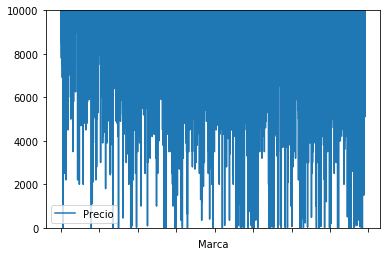

In [38]:
plot = df_cars.plot(x='Marca', y='Precio')
plot.set_ylim(0, 10000)

    * Chevrolet vs Precio

(0, 100000)

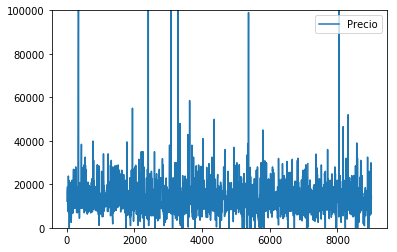

In [42]:
df_chevrolet = df_cars[df_cars['Marca'] == 'Chevrolet']
plot_chevrolet = df_chevrolet.plot(y='Precio')
plot_chevrolet.set_ylim(0, 100000)


    * Chevrolet que superan los 20000 dolares

In [44]:
df_chevrolet_mayor_9000 = df_cars[(df_cars['Marca'] == 'Chevrolet') & (df_cars['Precio'] > 20000)]
df_chevrolet_mayor_9000

,Informacion,Localizacion,Precio,Negociacion,Publicacion,Marca
47,Chevrolet D-Max 2016 - 88000 km,en Quito,23800.0,Negociable,"Hoy,",Chevrolet
73,Auto en venta: Chevrolet Cruze 2016 TM full eq...,en Quito,21700.0,Negociable,"Hoy,",Chevrolet
113,Chevrolet Cruze 2015 - 33800 km,en Quito,20900.0,NaN,"Hoy,",Chevrolet
153,Chevrolet Captiva 2014 - 55000 km,en Quito,21900.0,Negociable,"Hoy,",Chevrolet
200,Chevrolet Cruze Turbo Ta 2017 Full,en Quito,26900.0,NaN,"Hoy,",Chevrolet
215,Chevrolet Tracker 2019 - 0 km,en Quito,26490.0,Negociable,"Hoy,",Chevrolet
247,Chevrolet Vitara 2019 - 0 km,en Quito,25490.0,NaN,"Hoy,",Chevrolet
250,Chevrolet D-Max 2014 - 118000 km,en Quito,26800.0,NaN,"Hoy,",Chevrolet
265,Chevrolet D-Max 2019 - 0 km,en Quito,28000.0,NaN,"Hoy,",Chevrolet
347,Chevrolet Aveo 2018 - 0 km,en Quito,155002.0,NaN,"Hoy,",Chevrolet


    * Numero de vehiculos por marcas

In [65]:
serie_agrupado_marcas_cantidad = df_cars['Marca'].groupby(df_cars['Marca']).agg('count')
df_agrupado_marcas_cantidad = pd.DataFrame({'Marca': serie_agrupado_marcas_cantidad.index, 'Cantidad': serie_agrupado_marcas_cantidad.data})
# df_agrupado_marcas_cantidad = df_agrupado_marcas_cantidad.reset_index(drop=True)
df_agrupado_marcas_cantidad
# plot_agrapdo = df_agrupado_marcas_cantidad.plot()
# plot_agrapdo.set_ylim(0, 50)

/home/mathcrap/bin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.data is deprecated and will be removed in a future version
  


,Marca,Cantidad
0,AC,7
1,ACCIONES,1
2,AHORA,1
3,AIRE,3
4,ALQUILER,2
5,AMAROK,1
6,AUDI,7
7,AUTO,1
8,AUTOMOVIL,1
9,AVEO,9


KeyError: 'Marca'

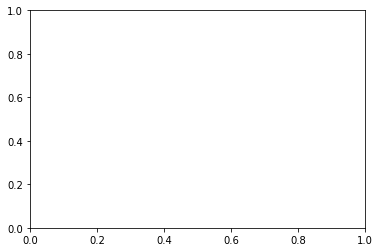

In [53]:
fig1, ax1 = plt.subplots()
ax1.pie(df_agrupado_marcas_cantidad, labels=df_agrupado_marcas_cantidad['Marca'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()